## Movie Recommendation Platform

Over the past two decades, there has been a monumental shift in how people access and consume video content. With the universal access to broadband internet, numerous platforms like **YouTube, Netflix, HBO Go** emerged and steadily grew to prominence.

Although not a household name in itself, OTT is the exact technology that made the streaming revolution possible.

**OTT stands for Over The Top**, refers to any video streaming service delivering content to the users over the internet, however there are subscription charges associated with the usage of such platforms such as **PrimeVideo, Netflix, HotStart, Zee5, SonyLiv** etc. But choosing your next movie to watch can still be a daunting task, even if you have access to all the platforms.

The data used is open source data which has been collected and made available from the **MovieLens** web site (http://movielens.org), a part of GroupLens Research The data sets were collected over various periods of time, depending on the size of the set.

### Data Description

The data consists of 105339 ratings applied over 10329 movies. The average rating is 3.5 and minimum and maximum rating is 0.5 and 5 respectively. There are 668 users who have given their ratings for 149532 movies.

There are two data files which are used:

- **`Movies.csv`**
  - **movieId**: ID assigned to a movie
  - **title**: Title of a movie
  - **genres**: pipe separated list of movie genres.
 - **`Ratings.csv`**
   - **userId**: ID assigned to a user
   - **movieId**: ID assigned to a movie
   - **rating**: rating by a user to a movie
   - **Timestamp**: time at which the rating was provided.

In [1]:
#importing necessary libraries 
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer # for vectorizing genres 
from sklearn.metrics.pairwise import cosine_similarity #to find similarity
from ipywidgets import * # to create interactive modules 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = 50 # None

In [3]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

## Exploratory Data Analysis

- Undertanding Data

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [8]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [9]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

There are No missing values in both of the dataFrames

## Understanding of distribution of the features available

In [10]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


Average Rating of a movie is 3.5

## Finding unique users and movies

In [11]:
ratings['userId'].nunique()

668

In [12]:
movies['movieId'].nunique(), ratings['movieId'].nunique()

(10329, 10325)

There are 668 unique users rating 10325 movies, however total movies present are 10329

## Data Analysis

In [13]:
genres=[]
for genre in movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)    

In [14]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)

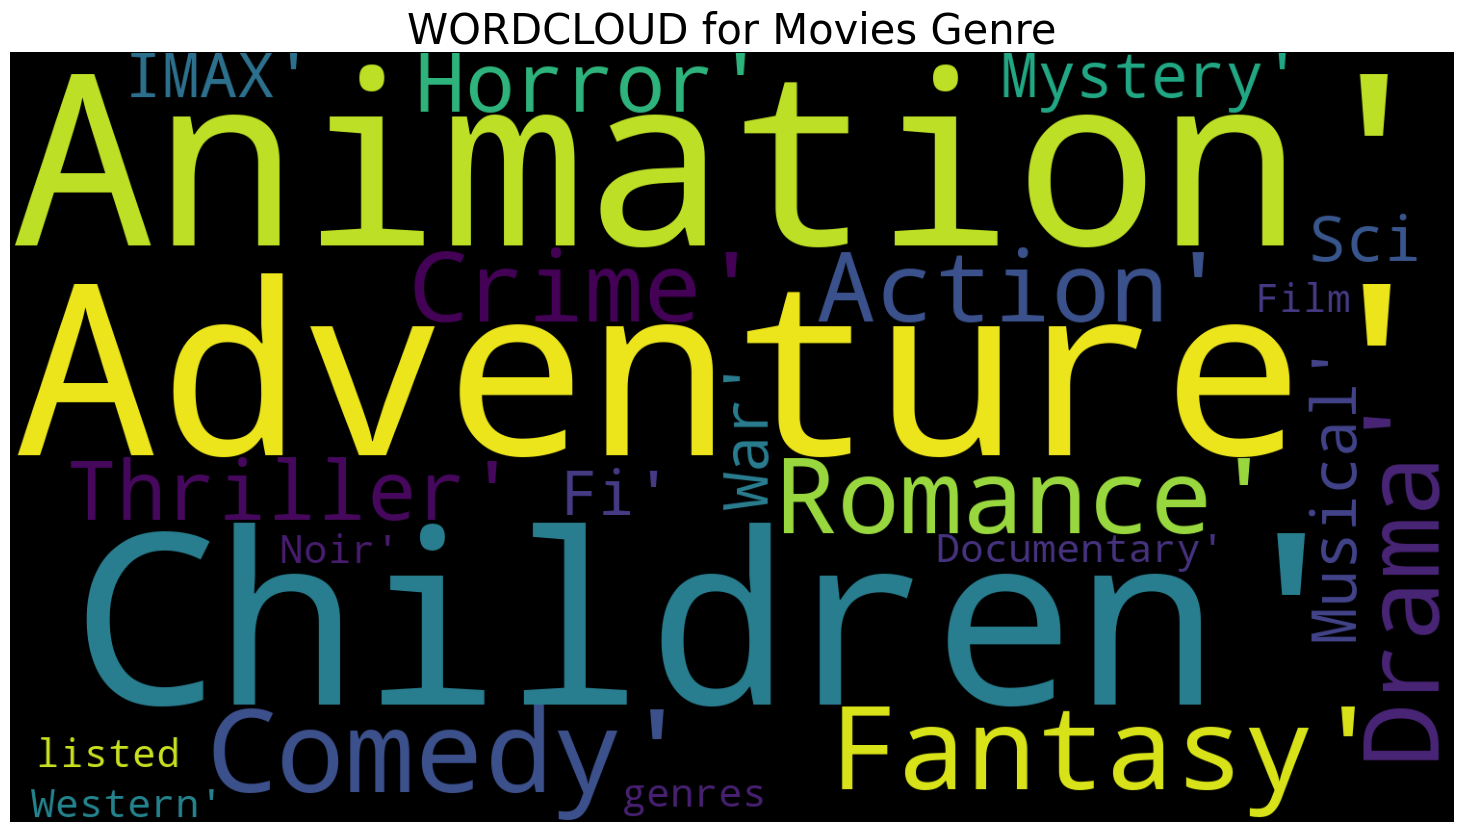

In [15]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

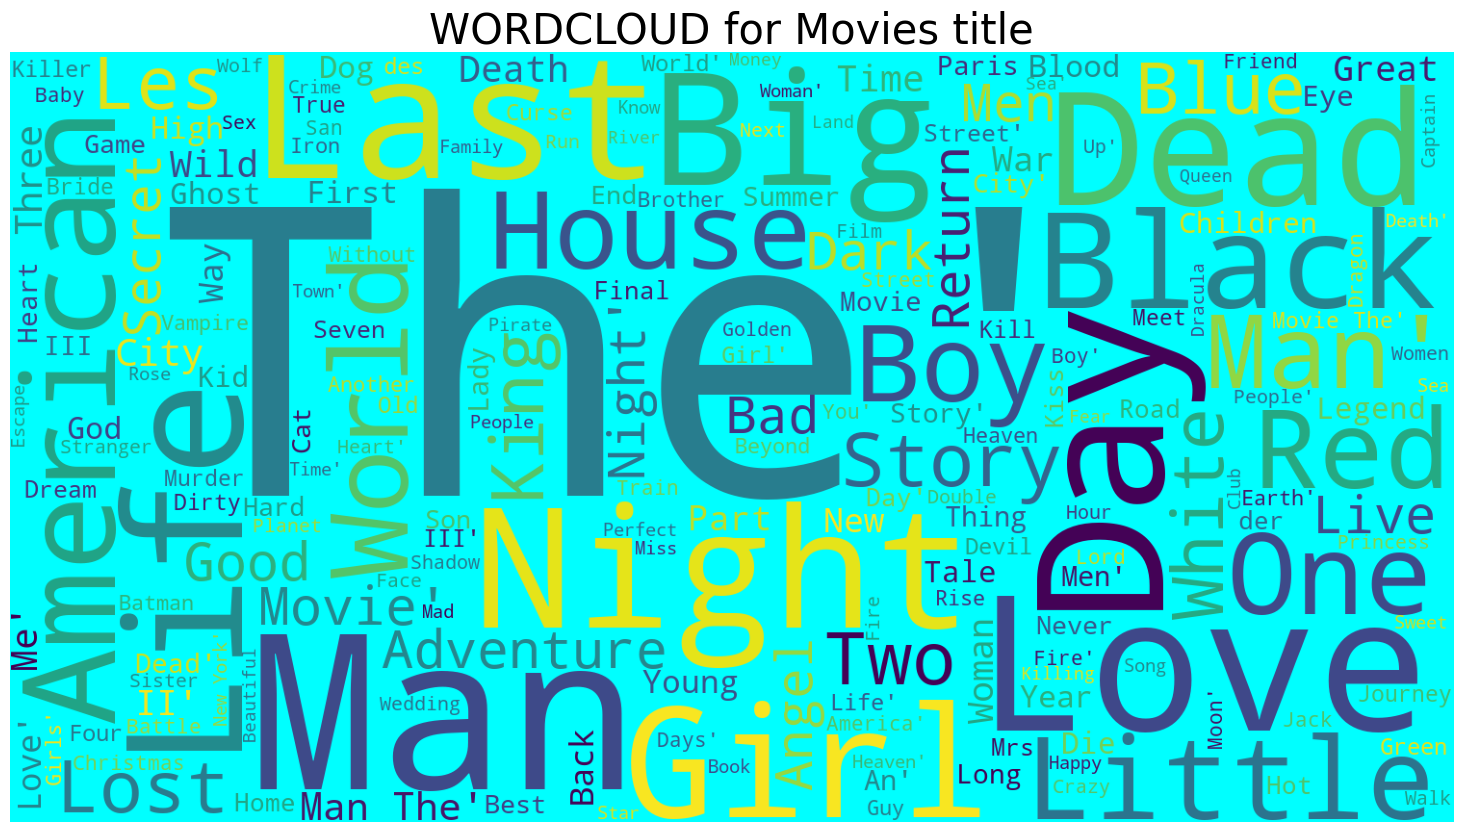

In [16]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title)

In [17]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [18]:
df1=df.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


<BarContainer object of 20 artists>

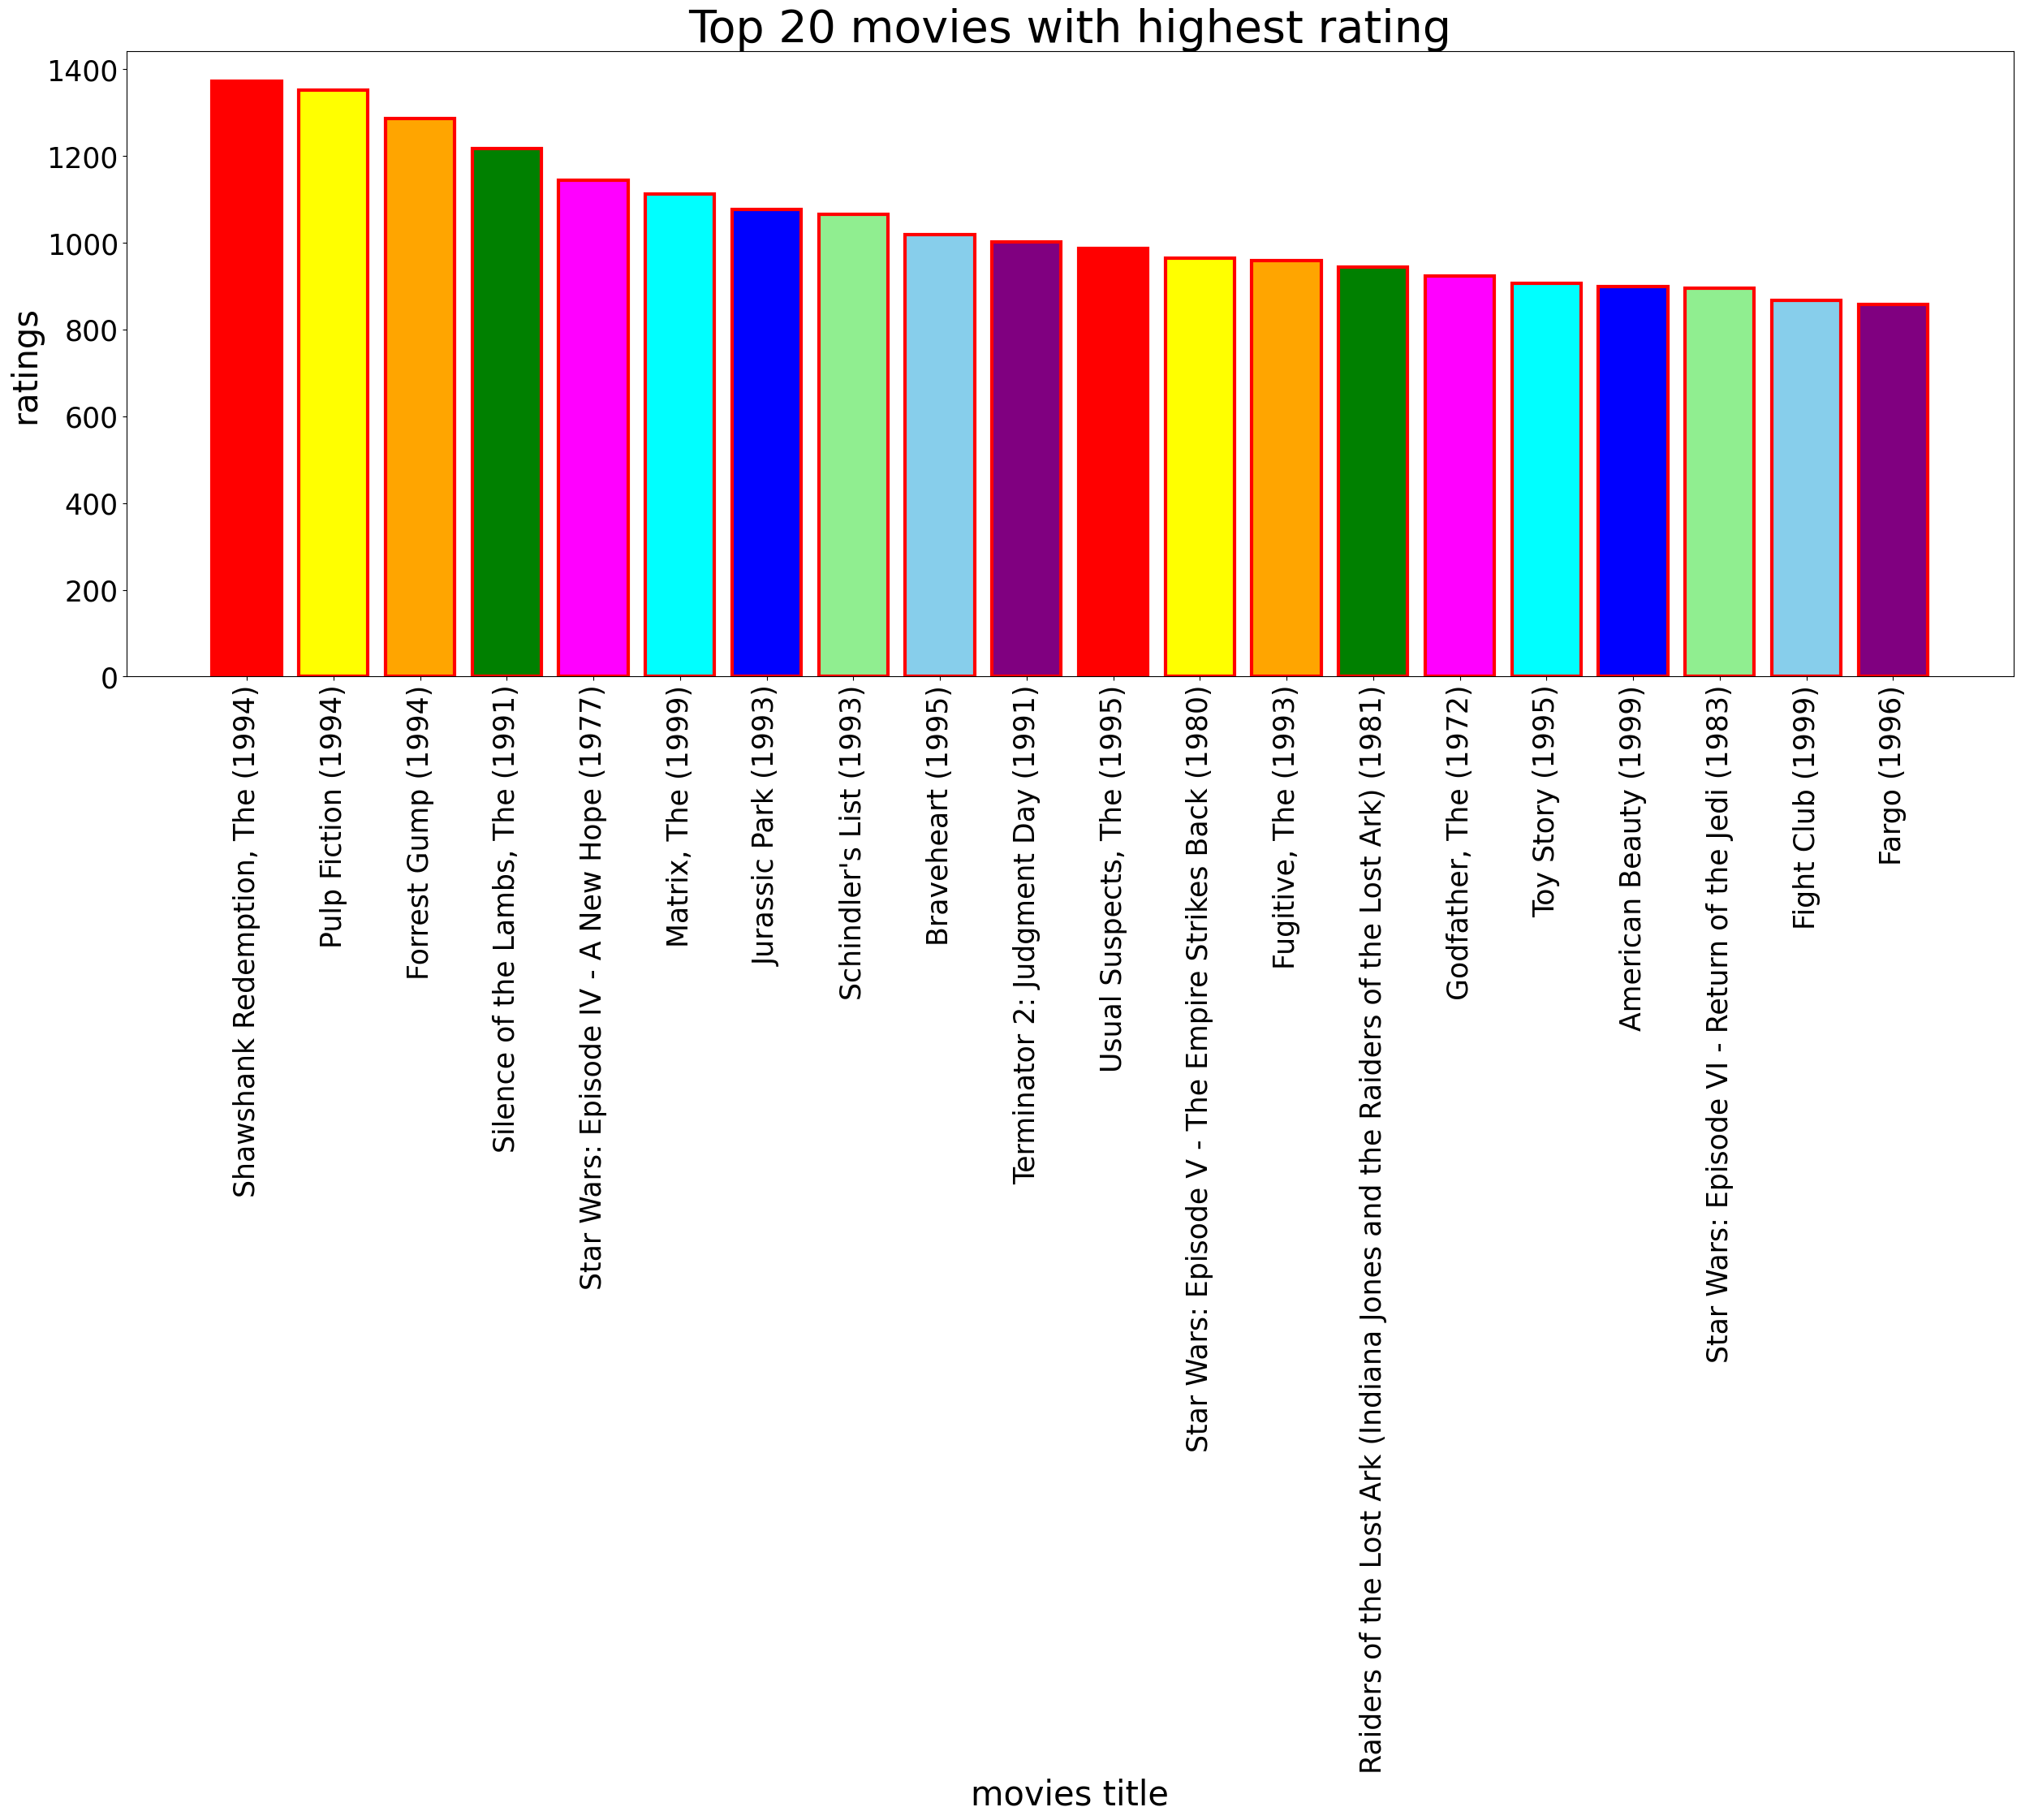

In [19]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)

In [20]:
df2=df.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


<BarContainer object of 20 artists>

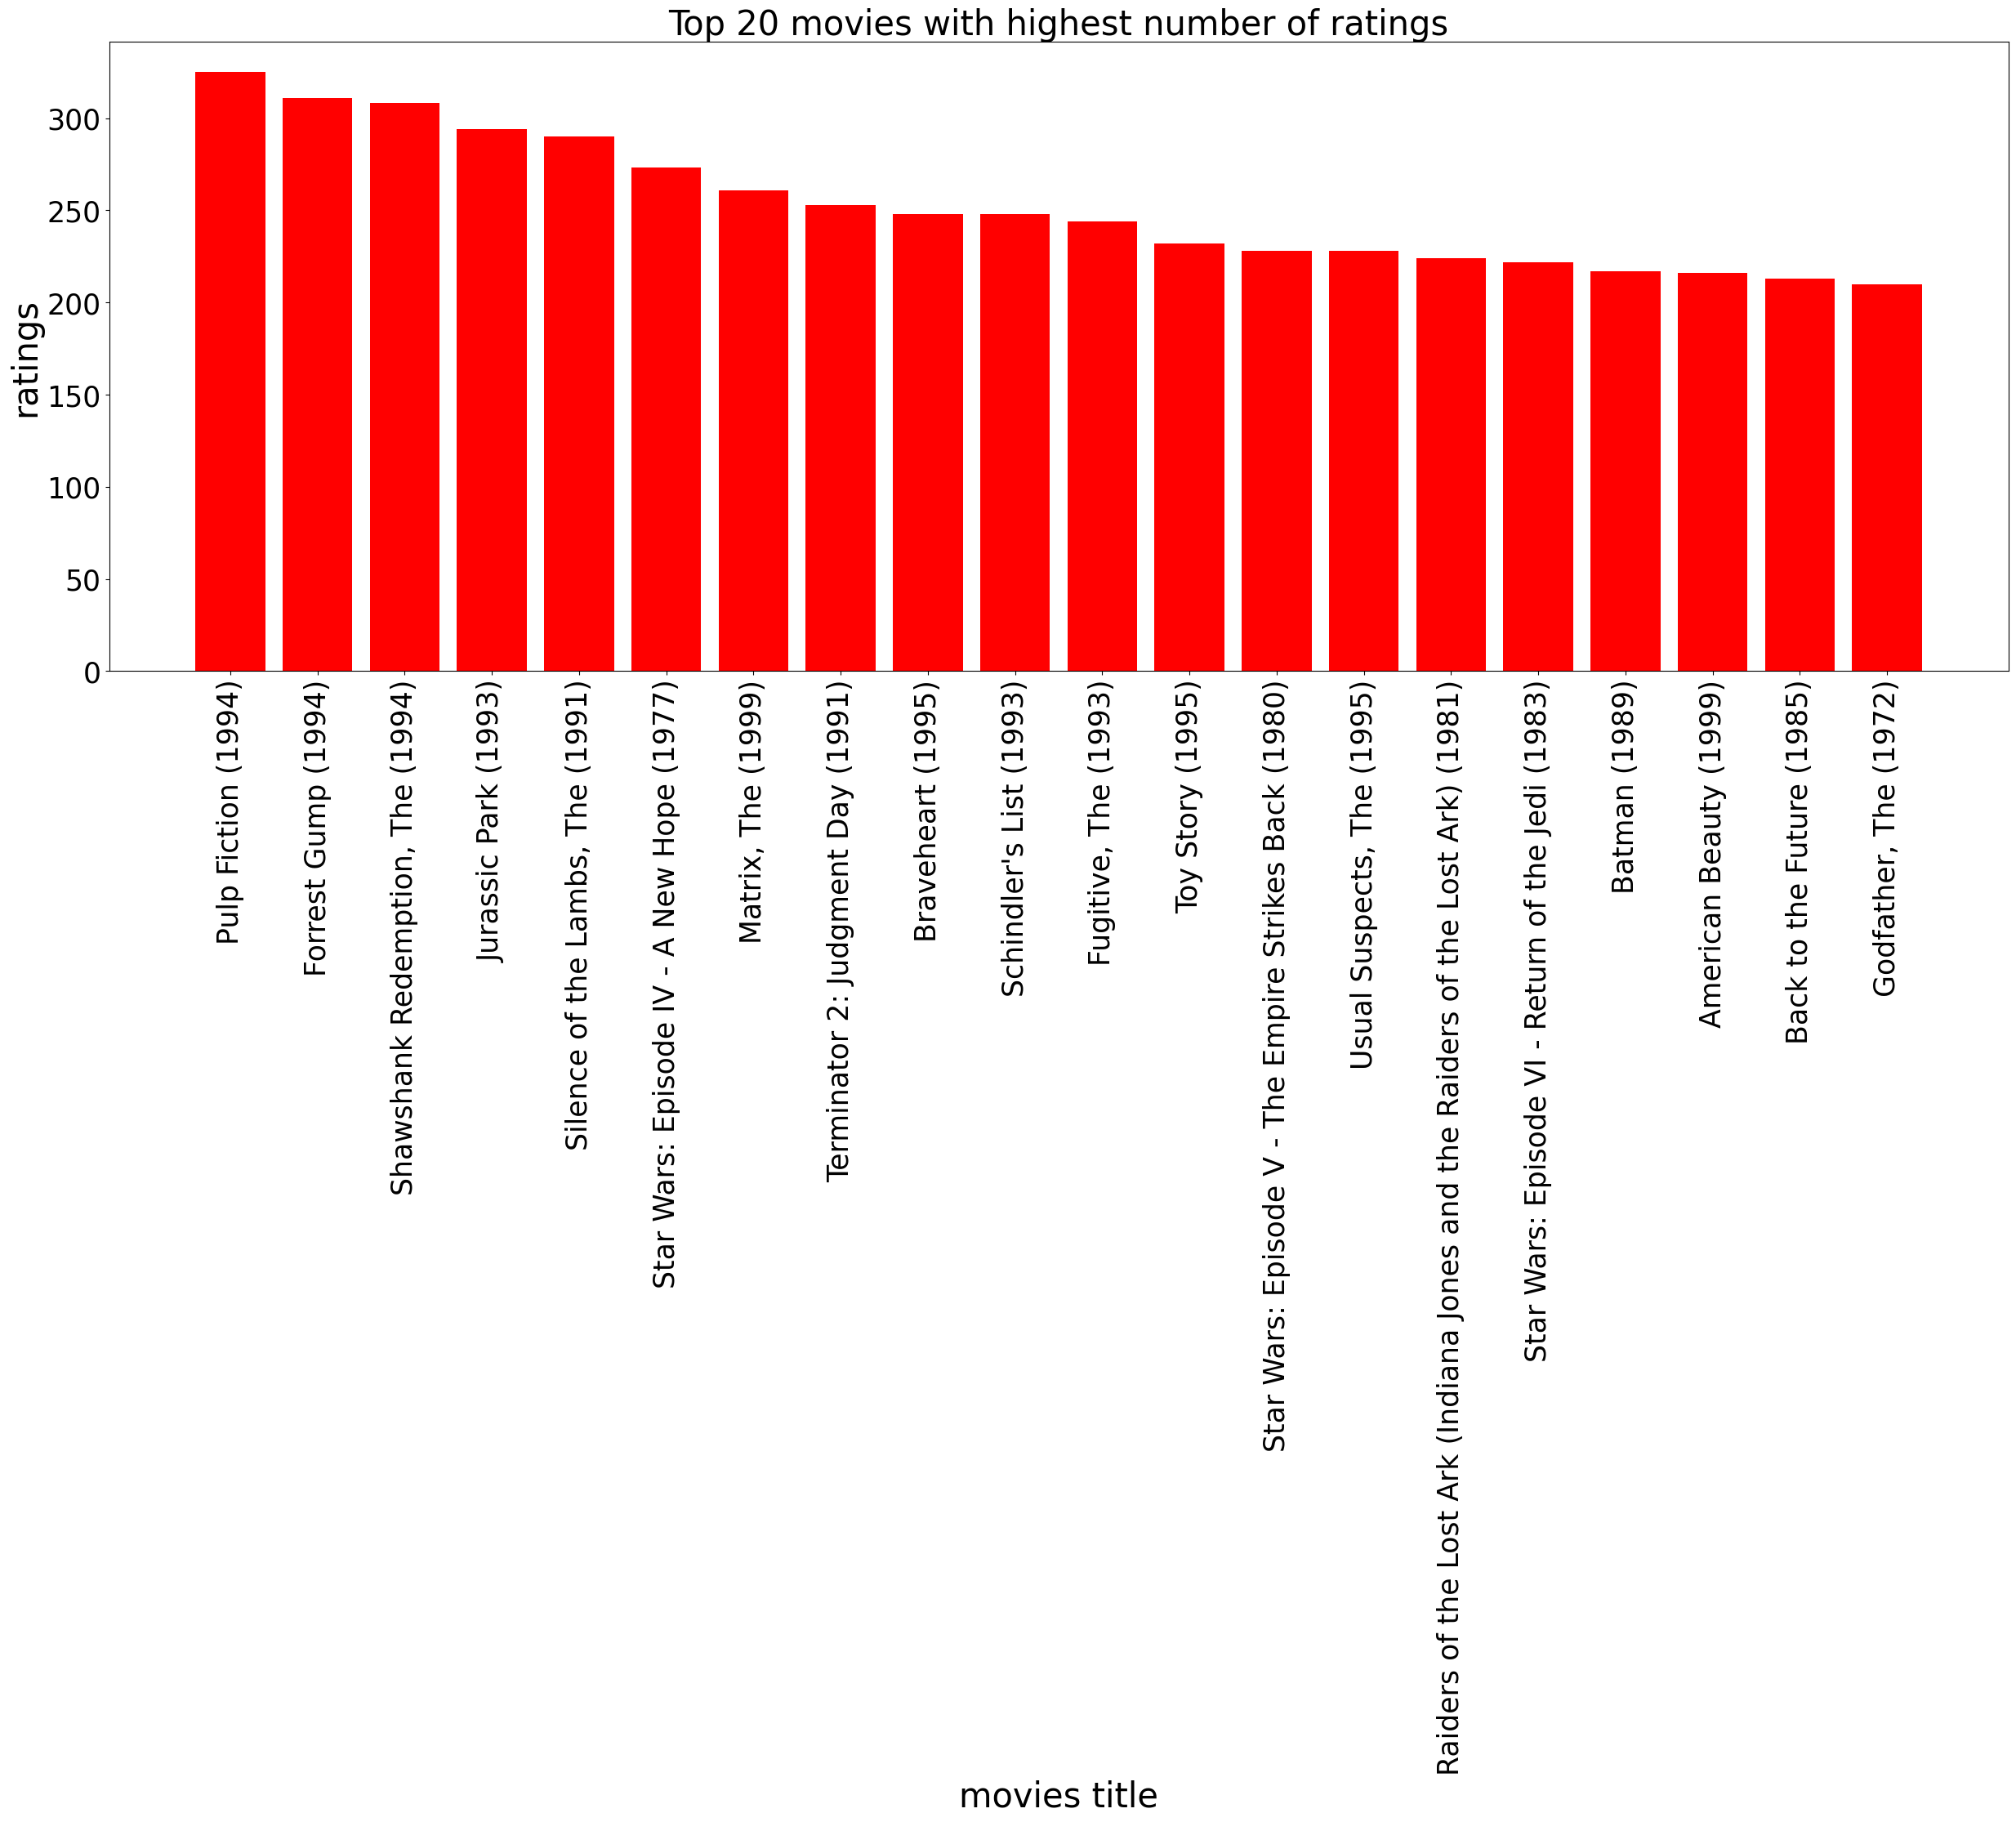

In [21]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating,color='red')

## Average rating and Total movies at genre level

In [22]:
movies['genres']=movies['genres'].str.split("|")

In [23]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [24]:
movies2=movies.explode('genres')

In [25]:
movies2.head(20)

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance


In [26]:
merged_info=pd.merge(ratings,movies2,on=['movieId'],how="inner")
print(merged_info.groupby('genres').agg({"title":"nunique",
                                         "rating":"mean"}).reset_index().rename(columns={"title":"unique_movies_count",
                                                                                         "rating":"mean_rating"}))

                genres  unique_movies_count  mean_rating
0   (no genres listed)                    7     3.071429
1               Action                 1736     3.451450
2            Adventure                 1164     3.518027
3            Animation                  400     3.635350
4             Children                  540     3.439429
5               Comedy                 3513     3.420996
6                Crime                 1440     3.642392
7          Documentary                  415     3.643035
8                Drama                 5217     3.650266
9              Fantasy                  670     3.500459
10           Film-Noir                  195     3.913636
11              Horror                 1001     3.281097
12                IMAX                  152     3.641821
13             Musical                  409     3.571962
14             Mystery                  675     3.652043
15             Romance                 1788     3.544255
16              Sci-Fi         

### Unique genres, users and movie available

In [27]:
movies2['genres'].unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [28]:
movies2['genres'].nunique()

20

It seems there are 20 different genre values, however one of the values is '(no genres listed)'. Hence, 19 unique Genres.

In [29]:
#Removing (no genres listed) from genres.
movies2=movies2[movies2['genres']!="(no genres listed)"]

In [30]:
movies2['genres'].nunique()

19

In [31]:
movies2['genres'].unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary',
       'Western', 'Film-Noir'], dtype=object)

## 1. Popularity based Recommendations

In [32]:
#User Defined Function to display topN movies to be recommended 

def TopNPopularMovies(genre,num_ratings_threshold,topN=5):
  
  #Calculating mean of ratings and number of ratings
  popularity_df=merged_info.groupby(['genres','title']).agg({'rating':["mean","size"]}).reset_index()
  popularity_df.columns=['genre','title','ratings_mean','ratings_counts']
  
  #Filtering desired genre and number of reviews threshold 
  topN_recommendations=popularity_df[(popularity_df['genre']==genre) & (popularity_df['ratings_counts']>=num_ratings_threshold)].sort_values(by=['ratings_mean'],ascending=False).head(topN)
  
  #Refactoring output
  topN_recommendations['S.No']=list(range(1,len(topN_recommendations)+1))
  topN_recommendations.index=range(len(topN_recommendations))
  topN_recommendations.columns=['Genre','Movie Title','Average Movie Rating','Num Reviews','S.No']
  return topN_recommendations[['S.No','Movie Title','Average Movie Rating','Num Reviews']]

In [33]:
#Testing Function : Try 1
genre="Action"
num_ratings_threshold=100
topN=10
TopNPopularMovies(genre=genre,
                  num_ratings_threshold=num_ratings_threshold,
                  topN=topN)

,S.No,Movie Title,Average Movie Rating,Num Reviews
0,1,"Matrix, The (1999)",4.264368,261
1,2,Star Wars: Episode V - The Empire Strikes Back...,4.228070,228
2,3,Raiders of the Lost Ark (Indiana Jones and the...,4.212054,224
3,4,Inception (2010),4.189320,103
4,5,Star Wars: Episode IV - A New Hope (1977),4.188645,273
5,6,Fight Club (1999),4.188406,207
6,7,Blade Runner (1982),4.169872,156
7,8,"Princess Bride, The (1987)",4.163743,171
8,9,Aliens (1986),4.146497,157
9,10,"Dark Knight, The (2008)",4.141732,127


In [34]:
#Testing Function : Try 2

genre="Comedy"
num_ratings_threshold=50
topN=10
TopNPopularMovies(genre=genre,
                  num_ratings_threshold=num_ratings_threshold,
                  topN=topN)

,S.No,Movie Title,Average Movie Rating,Num Reviews
0,1,Monty Python and the Holy Grail (1975),4.301948,154
1,2,Fargo (1996),4.271144,201
2,3,Life Is Beautiful (La Vita è bella) (1997),4.253425,73
3,4,"Sting, The (1973)",4.207792,77
4,5,Annie Hall (1977),4.205882,68
5,6,My Fair Lady (1964),4.170000,50
6,7,Wallace & Gromit: The Wrong Trousers (1993),4.168831,77
7,8,"Princess Bride, The (1987)",4.163743,171
8,9,Wallace & Gromit: A Close Shave (1995),4.163636,55
9,10,Pulp Fiction (1994),4.160000,325


## 2. Content based Recommendations

Content considered here will be genres, so we need to convert the genres to vectors, there can be multiple approached to perform this however we are going to use TF-IDF vectorizer to achieve the same.

In [35]:
#Creating a string of genres in order to apply TF-IDF further
movies3=movies2.groupby("title").agg({"genres":lambda x : " ".join(list(x))}).reset_index()
movies3

,title,genres
0,'71 (2014),Action Drama Thriller War
1,'Hellboy': The Seeds of Creation (2004),Action Adventure Comedy Documentary Fantasy
2,'Round Midnight (1986),Drama Musical
3,'Til There Was You (1997),Drama Romance
4,"'burbs, The (1989)",Comedy
...,...,...
10315,loudQUIETloud: A Film About the Pixies (2006),Documentary
10316,xXx (2002),Action Crime Thriller
10317,xXx: State of the Union (2005),Action Crime Thriller
10318,¡Three Amigos! (1986),Comedy Western


In [36]:
#Running TF-IDF using n grams from 1 to 3, this can be experimented with as well 
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 3),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies3['genres'])
#Computing cosine similarity 
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [37]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [38]:
#User defined function to recommend similar movies
def recommendations_genre(movie_df,similarity_matrix,movie_title,topN=5):
    #Target movie title
    titles = movie_df['title']
    #Index of all other movies 
    indices = pd.Series(movie_df.index, index=movie_df['title'])
    #Index of target movie 
    index = indices[movie_title]
    #Generating cosine similarity scores
    cosine_similarity_scores = list(enumerate(similarity_matrix[index]))
    #Descending order sorting based on scores
    cosine_similarity_scores = sorted(cosine_similarity_scores, key=lambda x: x[1], reverse=True)
    #Selecting topN movies to be recommended ( it can contain the same movie as well, hence choosing topN+2)
    cosine_similarity_scores = cosine_similarity_scores[1:topN+2]
    #Extracting matched movies 
    matching_movies = [i[0] for i in cosine_similarity_scores]
    matches_df=movie_df.iloc[matching_movies]
    matches_df=matches_df[matches_df['title']!=movie_title]
    #Refactoring output 
    matches_df.rename(columns={'title':'Movie Title'},inplace=True)
    matches_df['S.No']=range(1,len(matches_df)+1)
    matches_df.index=range(len(matches_df))
    return matches_df[['S.No','Movie Title']].head(topN)

In [39]:
#Testing above function: Try 1
movie_title="Toy Story (1995)"
topN=10
recommendations_genre(movie_df=movies3,
                      similarity_matrix=cosine_sim,
                      movie_title=movie_title,
                      topN=topN)

,S.No,Movie Title
0,1,Antz (1998)
1,2,Asterix and the Vikings (Astérix et les Viking...
2,3,"Boxtrolls, The (2014)"
3,4,DuckTales: The Movie - Treasure of the Lost La...
4,5,"Emperor's New Groove, The (2000)"
5,6,"Monsters, Inc. (2001)"
6,7,Shrek the Third (2007)
7,8,"Tale of Despereaux, The (2008)"
8,9,Toy Story 2 (1999)
9,10,Turbo (2013)


In [40]:
#Testing above function: Try 2
movie_title="Avatar (2009)"
topN=10
recommendations_genre(movie_df=movies3,
                      similarity_matrix=cosine_sim,
                      movie_title=movie_title,
                      topN=topN)

,S.No,Movie Title
0,1,"Amazing Spider-Man, The (2012)"
1,2,"Avengers, The (2012)"
2,3,Captain America: The Winter Soldier (2014)
3,4,Ender's Game (2013)
4,5,Godzilla (2014)
5,6,"Hunger Games: Catching Fire, The (2013)"
6,7,John Carter (2012)
7,8,Oblivion (2013)
8,9,Pacific Rim (2013)
9,10,Spider-Man 2 (2004)


In [41]:
#Using pivot table to create a one hot encoded vector for all the movies 
movies4=movies2.pivot_table(index=['title'],columns=['genres']).fillna(0).applymap(lambda x: int(x>0)).reset_index()

movies4.index=range(0,len(movies4))
new_columns=['title']+list(map(lambda x : x[1] , movies4.columns))[1:]
movies4.columns=new_columns

#Generating new data frame representing binarized genres 
movies5=pd.merge(movies[['title','movieId']],movies4)
movies5.head()

,title,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story (1995),1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Jumanji (1995),2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men (1995),3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Waiting to Exhale (1995),4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,Father of the Bride Part II (1995),5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
#Generating new similarity metrics 
movie_genre_vector = movies5.loc[:,"Action":].values
cosine_sim2 = cosine_similarity(movie_genre_vector, movie_genre_vector)

In [43]:
#Testing the same function,but using different vectorized dataframe and similarity metrics: Try 1

movie_title="Toy Story (1995)"
topN=10
recommendations_genre(movie_df=movies5,
                      similarity_matrix=cosine_sim2,
                      movie_title=movie_title,
                      topN=topN)

,S.No,Movie Title
0,1,Antz (1998)
1,2,Toy Story 2 (1999)
2,3,"Adventures of Rocky and Bullwinkle, The (2000)"
3,4,"Emperor's New Groove, The (2000)"
4,5,"Monsters, Inc. (2001)"
5,6,DuckTales: The Movie - Treasure of the Lost La...
6,7,"Wild, The (2006)"
7,8,Shrek the Third (2007)
8,9,"Tale of Despereaux, The (2008)"
9,10,Asterix and the Vikings (Astérix et les Viking...


In [44]:
#Testing the same function,but using different vectorized dataframe and similarity metrics: Try 2

movie_title="Avatar (2009)"
topN=10
recommendations_genre(movie_df=movies5,
                      similarity_matrix=cosine_sim2,
                      movie_title=movie_title,
                      topN=topN)

,S.No,Movie Title
0,1,Spider-Man 2 (2004)
1,2,Superman Returns (2006)
2,3,Star Trek (2009)
3,4,Transformers: Revenge of the Fallen (2009)
4,5,Tron: Legacy (2010)
5,6,"Avengers, The (2012)"
6,7,John Carter (2012)
7,8,"Amazing Spider-Man, The (2012)"
8,9,Oblivion (2013)
9,10,Star Trek Into Darkness (2013)


Results might be similar as there is just genre which we have considered, however had there been additional data points such as plot description, actors, directors etc., then those can be addedd to the text and TF-IDF Vectorizer could have been a more sophisticated approach, so in the final UI, only TF-IDF based will be demonstrated.

## 3. Collaborative Filtering based Recommendations

**Algorithm to make recommendations**

- Select the target user ID and extract history
- Find the subset users who have watched the same movies.
- Sort them based on the number of movies they have watched compared to our target user
- Select "U" users based on a specificed criteria, here the criteria is that the users selected for candidates must have rated atleast "p" percent of the movies which our target user has rated.
- Out of the U users, find similarity using any appropriate method
  - Cosine Similariy
  - Pearson Correlation

- Filter out top "K" users having highest similarity.
- List down all the movies reviewed by these "K" similar users after removing the movies watched by target user and sort them in descending order of average rating
- Recommend top "N" movies

In [45]:
#Movies with IDs
movies6=movies5[['title','movieId']]
movies6.head()

,title,movieId
0,Toy Story (1995),1
1,Jumanji (1995),2
2,Grumpier Old Men (1995),3
3,Waiting to Exhale (1995),4
4,Father of the Bride Part II (1995),5


In [46]:
#Ratings
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [47]:
# Function to fetch user history
def FetchUserHistory(userid):
    user_ratings = ratings[ratings['userId'] == userid]
    user_history = pd.merge(user_ratings, movies6, how="inner", on="movieId").sort_values('movieId')
    return user_history

In [48]:
def GenerateSimilarUsersRecommendations(target_user_id,p,k,topN):

  #Fetching user history 
  user_history=FetchUserHistory(userid=target_user_id)

  #Finding all users who have seen similar movies
  similar_users = ratings[ratings['movieId'].isin(user_history['movieId'].tolist())]

  #Finding num of movies reviewed by candidate similar users 
  similar_uses_num_movie_reviewed=similar_users.groupby("userId").agg({"movieId":"nunique"}).reset_index().rename(columns={'movieId':'num_movies_reviewed'})\
                                                                                          .sort_values(by='num_movies_reviewed',ascending=False)
  #Removing target user ID from the similar user subset
  similar_uses_num_movie_reviewed=similar_uses_num_movie_reviewed[similar_uses_num_movie_reviewed['userId']!=target_user_id]

  #Movies Rated by Target user
  movies_rated_by_target_user=user_history['movieId'].nunique()

  #Min movies rated by candidate similar users : Criteria 1 : Should be atleast 50% ( p is set to 50)
  min_movies_rated_threshold=int(movies_rated_by_target_user*(p/100))

  #Filtered candidates of similar users 
  similar_uses_num_movie_reviewed=similar_uses_num_movie_reviewed[similar_uses_num_movie_reviewed['num_movies_reviewed']>=min_movies_rated_threshold]

  # Ratings Data for filtered candidates of similar users 
  bestN_similar_users=similar_users[similar_users['userId'].isin(list(set(similar_uses_num_movie_reviewed.userId)))]

  #Creating vector representation for target user
  user_vector=user_history.pivot(index='userId',columns=['movieId'],values=['rating'])
  user_vector.columns=[str(each[1]) for each in user_vector.columns]

  #Creating vector representation for candidate similar users
  bestN_vectors=bestN_similar_users.pivot(index='userId',columns=['movieId'],values=['rating']).fillna(0)
  bestN_vectors.columns=[str(each[1]) for each in bestN_vectors.columns]

  #Matching column names
  for each in set(user_vector.columns)-set(bestN_vectors.columns):
        bestN_vectors[each]=0.0

  bestN_vectors=bestN_vectors[user_vector.columns]

  #Finding Cosine Similarity Amongst all the candidate users
  similarity_df=pd.DataFrame(cosine_similarity(user_vector,bestN_vectors)).T
  similarity_df.index=bestN_vectors.index
  similarity_df.columns=['similarity_score']

  #Filtering out top K similar users 
  topK_user_ids=list(similarity_df.sort_values('similarity_score',ascending=False).index[:k])

  #Selecting ratings data of similar K users 
  similar_users_subset=ratings[(ratings['userId'].isin(topK_user_ids))]


  #Selecting movies other than the ones rated by our target user
  similar_users_subset=similar_users_subset[~similar_users_subset['movieId'].isin(user_history['movieId'])]

  #Sorting the movies based on best average ratings of similar users and choosing topN movies
  best_recommended_movies=similar_users_subset.groupby('movieId').mean()[['rating']].reset_index().sort_values('rating',ascending=False)[:topN]

  #Output topN recommendations 
  output_df=pd.merge(best_recommended_movies,movies6)
  output_df.columns=['Movie ID','Average Rating', "Movie Title"]
  output_df['S.No']=range(1,len(output_df)+1)

  #User History
  user_history.rename(columns={'title':"Movie Title"},inplace=True)
  user_history=user_history.sort_values('rating',ascending=False)
  user_history['S.No']=range(1,len(user_history)+1)

  return user_history[['S.No',"Movie Title"]],output_df[['S.No',"Movie Title"]]



In [49]:
#Testing the above function: Try 1

target_user_id=2
p=90
k=100
topN=10

history,recommendations=GenerateSimilarUsersRecommendations(target_user_id=target_user_id,
                                    p=p,
                                    k=k,
                                    topN=topN)

In [50]:
history

,S.No,Movie Title
0,1,Toy Story (1995)
26,2,"Time to Kill, A (1996)"
4,3,Sense and Sensibility (1995)
7,4,Dead Man Walking (1995)
10,5,Mr. Holland's Opus (1995)
17,6,Fargo (1996)
15,7,"River Wild, The (1994)"
27,8,Willy Wonka & the Chocolate Factory (1971)
25,9,Phenomenon (1996)
24,10,"Nutty Professor, The (1996)"


In [51]:
recommendations

,S.No,Movie Title
0,1,Mother (1996)
1,2,Up Close and Personal (1996)
2,3,Ransom (1996)
3,4,"Rock, The (1996)"
4,5,"Birdcage, The (1996)"
5,6,Heat (1995)
6,7,Happy Gilmore (1996)
7,8,Down Periscope (1996)
8,9,Muppet Treasure Island (1996)
9,10,Sabrina (1995)


In [52]:
#Testing the above function: Try 2
target_user_id=4
p=50
k=100
topN=10
history,recommendations=GenerateSimilarUsersRecommendations(target_user_id=target_user_id,
                                    p=p,
                                    k=k,
                                    topN=topN)

In [53]:
history

,S.No,Movie Title
123,1,M*A*S*H (a.k.a. MASH) (1970)
93,2,Tarzan (1999)
26,3,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
101,4,"Color Purple, The (1985)"
29,5,Love in the Afternoon (1957)
...,...,...
106,120,Dudley Do-Right (1999)
97,121,Mystery Men (1999)
73,122,"Big Lebowski, The (1998)"
96,123,Lake Placid (1999)


In [54]:
recommendations

,S.No,Movie Title
0,1,Joe's Apartment (1996)
1,2,Life as a House (2001)
2,3,Dracula (1931)
3,4,Tortilla Soup (2001)
4,5,Bedknobs and Broomsticks (1971)
5,6,"Three Caballeros, The (1945)"
6,7,Labyrinth (1986)
7,8,Double Happiness (1994)
8,9,Eve's Bayou (1997)
9,10,21 Up (1977)


## Interactions

We will be using `Ipywidgets` in order to create an interactive module

In [55]:
#Popularity based Recommendations 

#Inputs for the functions 
genres=Dropdown(options=list(set(movies2.genres)),description="Genre",style= {'description_width': 'initial'})
num_reviews=IntText(description="Min Reviews",style= {'description_width': 'initial'})
num_recommendations_1=IntText(description="Num Recommendations",style= {'description_width': 'initial'})
#Stacking inputs in a tab 
b1=Button(description='Recommend Me',style= {'description_width': 'initial'})
h1=HBox([num_reviews, num_recommendations_1])
popularity_tab=VBox([genres,h1,b1])


#Content based Recommendations

#Inputs for the functions 
title=Textarea(description="Movie Title",style= {'description_width': 'initial'})
num_recommendations_2=IntText(description="Num Recommendations",style= {'description_width': 'initial'})
#Stacking inputs in a tab  
h2=HBox([title, num_recommendations_2])
b2=Button(description='Recommend Me',style= {'description_width': 'initial'})
content_based_tab=VBox([h2,b2])


#Collaborative based Recommendations

#Inputs for the functions 
user_id=IntText(description="Target User ID",style= {'description_width': 'initial'})
p=IntText(description="Percentage of Movies Reviewed",style= {'description_width': 'initial'})
k=IntText(description="K similar users",style= {'description_width': 'initial'})
num_recommendations_3=IntText(description="Num Recommendations",style= {'description_width': 'initial'})

#Stacking inputs in a tab  
h3=HBox([user_id, num_recommendations_3])
h4=HBox([p, k])
b3=Button(description='Recommend Me',style= {'description_width': 'initial'})
collaborative_tab=VBox([h3,h4,b3])


#Creating tabs 
all_tabs=[popularity_tab,content_based_tab,collaborative_tab]
ui = widgets.Tab(all_tabs)

#Setting tab titles
names = ['Popularity Based', 'Content Based', 'Collaborative Filtering']
[ui.set_title(i, title) for i, title in enumerate(names)]

#Display tabs 
display(ui)

In [56]:
#Setting up events to respond on click of button for all three tabs individually.

#Popularity based Recommendations 
def on_b1_clicked(b):
  global output
  output=TopNPopularMovies(genre=genres.value,
                  num_ratings_threshold=num_reviews.value,
                  topN=num_recommendations_1.value)
b1.on_click(on_b1_clicked)

#Content based Recommendations
def on_b2_clicked(b):
  global output
  result=recommendations_genre(movie_df=movies5,
                               similarity_matrix=cosine_sim2,

                               movie_title=title.value,
                  topN=num_recommendations_2.value)
  output=result
b2.on_click(on_b2_clicked)

#Collaborative based Recommendations
def on_b3_clicked(b):
  global output
  history,recommendations=GenerateSimilarUsersRecommendations(target_user_id=user_id.value,
                                             p=p.value,
                  k=k.value,
                  topN=num_recommendations_3.value)
  output=recommendations.copy()
b3.on_click(on_b3_clicked)

In [57]:
display(ui)

In [59]:
#Configure inputs and run for Popularity based Output
output

,S.No,Movie Title,Average Movie Rating,Num Reviews
0,1,Touch of Evil (1958),4.476190,21
1,2,Rear Window (1954),4.331081,74
2,3,"Usual Suspects, The (1995)",4.328947,228
3,4,Chinatown (1974),4.323529,68
4,5,"Lives of Others, The (Das leben der Anderen) (...",4.306452,31
5,6,"Third Man, The (1949)",4.291667,36
6,7,North by Northwest (1959),4.273973,73
7,8,"Professional, The (Le professionnel) (1981)",4.272727,22
8,9,Fargo (1996),4.271144,201
9,10,"Matrix, The (1999)",4.264368,261


In [60]:
#Configure inputs and run for Content based Output
output

,S.No,Movie Title
0,1,Strange Days (1995)
1,2,Watchmen (2009)
2,3,RoboCop 3 (1993)
3,4,"X-Files: Fight the Future, The (1998)"
4,5,"Negotiator, The (1998)"
5,6,RoboCop (1987)
6,7,Insomnia (2002)
7,8,Minority Report (2002)
8,9,Man on Fire (2004)
9,10,Cellular (2004)


In [61]:
#Configure inputs and run for Collaborative based Output
output

,S.No,Movie Title
0,1,"Civil War, The (1990)"
1,2,Olive Kitteridge (2014)
2,3,Cabaret (1972)
3,4,"It's a Mad, Mad, Mad, Mad World (1963)"
4,5,"Maltese Falcon, The (1941)"
5,6,"Magic Flute, The (Trollflöjten) (1975)"
6,7,Monty Python Live at the Hollywood Bowl (1982)
7,8,Grandma's Boy (2006)
8,9,Recount (2008)
9,10,Dracula (1931)
